In [1]:
# Importing the modules required.
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps

from key import api_key, gkey

# Base URL to retrieve data from bls 
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
state_df = pd.read_csv("Resources/states.csv")
series_ids = state_df["Series Id"].tolist()

start_year = "1996"
end_year = "2006"
header = {"Content-Type": "application/json"}

payload = json.dumps({"seriesid":series_ids,
                     "startyear":start_year,
                     "endyear":end_year,
                      "registrationkey":api_key                      
                      })

state_response1 = requests.post(url,headers=header,data=payload).json()['Results']['series']
state_response1


[{'seriesID': 'LASST010000000000003',
  'data': [{'year': '2006',
    'period': 'M12',
    'periodName': 'December',
    'value': '3.9',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M11',
    'periodName': 'November',
    'value': '4.0',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M10',
    'periodName': 'October',
    'value': '4.0',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M09',
    'periodName': 'September',
    'value': '4.1',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M08',
    'periodName': 'August',
    'value': '4.1',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M07',
    'periodName': 'July',
    'value': '4.1',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M06',
    'periodName': 'June',
    'value': '4.1',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M05',
    'periodName': 'May',
    'value': '4.1',
    'footnotes': [{}]},
   {'year': '2006',
    'period': 'M04',
    'per

In [2]:
states1_df = pd.DataFrame(columns=['year','period','periodName','value','Stateid'])

for i in range(0, len(state_response1)):
     seriesDF = pd.DataFrame(state_response1[i]['data'])
     seriesDF["Stateid"] = state_response1[i]["seriesID"]
     states1_df = states1_df.append(seriesDF, ignore_index = True)
     
    
states1_df

,year,period,periodName,value,Stateid,footnotes
0,2006,M12,December,3.9,LASST010000000000003,[{}]
1,2006,M11,November,4.0,LASST010000000000003,[{}]
2,2006,M10,October,4.0,LASST010000000000003,[{}]
3,2006,M09,September,4.1,LASST010000000000003,[{}]
4,2006,M08,August,4.1,LASST010000000000003,[{}]
...,...,...,...,...,...,...
6595,1996,M05,May,7.4,LASST540000000000003,[{}]
6596,1996,M04,April,7.6,LASST540000000000003,[{}]
6597,1996,M03,March,7.7,LASST540000000000003,[{}]
6598,1996,M02,February,7.9,LASST540000000000003,[{}]


In [3]:
start_year = "2007"
end_year = "2016"
header = {"Content-Type": "application/json"}
payload = json.dumps({"seriesid":series_ids,
                     "startyear":start_year,
                     "endyear":end_year,
                      "registrationkey":api_key                      
                      })

state_response2 = requests.post(url,headers=header,data=payload).json()['Results']['series']

states2_df = pd.DataFrame(columns=['year','period','periodName','value','Stateid'])

for i in range(0, len(state_response2)):
     seriesDF= pd.DataFrame(state_response2[i]['data'])
     seriesDF["Stateid"] = state_response2[i]["seriesID"]
     states2_df = states2_df.append(seriesDF, ignore_index = True)

states2_df

,year,period,periodName,value,Stateid,footnotes
0,2016,M12,December,5.7,LASST010000000000003,[{}]
1,2016,M11,November,5.8,LASST010000000000003,[{}]
2,2016,M10,October,5.9,LASST010000000000003,[{}]
3,2016,M09,September,5.9,LASST010000000000003,[{}]
4,2016,M08,August,5.8,LASST010000000000003,[{}]
...,...,...,...,...,...,...
5995,2007,M05,May,4.4,LASST540000000000003,[{}]
5996,2007,M04,April,4.4,LASST540000000000003,[{}]
5997,2007,M03,March,4.5,LASST540000000000003,[{}]
5998,2007,M02,February,4.5,LASST540000000000003,[{}]


In [4]:
dataframes = [states2_df,states1_df]
states_df = pd.concat(dataframes)
states_df

,year,period,periodName,value,Stateid,footnotes
0,2016,M12,December,5.7,LASST010000000000003,[{}]
1,2016,M11,November,5.8,LASST010000000000003,[{}]
2,2016,M10,October,5.9,LASST010000000000003,[{}]
3,2016,M09,September,5.9,LASST010000000000003,[{}]
4,2016,M08,August,5.8,LASST010000000000003,[{}]
...,...,...,...,...,...,...
6595,1996,M05,May,7.4,LASST540000000000003,[{}]
6596,1996,M04,April,7.6,LASST540000000000003,[{}]
6597,1996,M03,March,7.7,LASST540000000000003,[{}]
6598,1996,M02,February,7.9,LASST540000000000003,[{}]


In [5]:
states_df = states_df.loc[(states_df['period'] == 'M12')|(states_df['period'] == 'M01')].reset_index(drop=True)
states_df=states_df.drop('footnotes', axis=1)
states_df


,year,period,periodName,value,Stateid
0,2016,M12,December,5.7,LASST010000000000003
1,2016,M01,January,6.0,LASST010000000000003
2,2015,M12,December,6.0,LASST010000000000003
3,2015,M01,January,6.0,LASST010000000000003
4,2014,M12,December,6.1,LASST010000000000003
...,...,...,...,...,...
2095,1998,M01,January,6.7,LASST540000000000003
2096,1997,M12,December,6.7,LASST540000000000003
2097,1997,M01,January,7.3,LASST540000000000003
2098,1996,M12,December,7.4,LASST540000000000003


In [6]:
states_df['value'] = states_df['value'].astype(float)
state_rateChange_df = pd.DataFrame(columns=['Series Id','year','Rate Change'])

for i in states_df.index:       
    if i%2==0:
        yearly_change = states_df['value'][i] - states_df['value'][i+1]
        stateid = states_df['Stateid'][i]
        year = states_df['year'][i]
        state_rateChange_df = state_rateChange_df.append({'Series Id':stateid,
                                                             'year': year,
                                                             'Rate Change':yearly_change
                                                             },ignore_index=True)

        
state_rateChange_df

,Series Id,year,Rate Change
0,LASST010000000000003,2016,-0.3
1,LASST010000000000003,2015,0.0
2,LASST010000000000003,2014,-1.1
3,LASST010000000000003,2013,-0.2
4,LASST010000000000003,2012,-0.5
...,...,...,...
1045,LASST540000000000003,2000,-0.4
1046,LASST540000000000003,1999,-0.5
1047,LASST540000000000003,1998,-0.3
1048,LASST540000000000003,1997,-0.6


In [7]:
state_year_df = pd.merge(state_df, state_rateChange_df, on='Series Id')
state_year_df = state_year_df[['STATES','Series Id', 'year','Rate Change']]
state_year_df.head()

,STATES,Series Id,year,Rate Change
0,Alabama,LASST010000000000003,2016,-0.3
1,Alabama,LASST010000000000003,2015,0.0
2,Alabama,LASST010000000000003,2014,-1.1
3,Alabama,LASST010000000000003,2013,-0.2
4,Alabama,LASST010000000000003,2012,-0.5


In [8]:
state_1996_2016 = state_year_df.groupby(['STATES','Series Id','year']).sum()
state_1996_2016.head(55)

Rate Change
STATES  Series Id            year             
Alabama LASST010000000000003 1996         -0.2
                             1997         -0.9
                             1998          0.2
                             1999          0.3
                             2000         -0.1
                             2001          1.3
                             2002         -0.3
                             2003          0.2
                             2004         -0.8
                             2005         -0.9
                             2006         -0.2
                             2007          0.4
                             2008          3.7
                             2009          2.9
                             2010         -1.4
                             2011         -1.9
                             2012         -0.5
                             2013         -0.2
                             2014         -1.1
                             2015          0.0
                             2016         -0.3
Alaska  LASST020000000000003 1996         -0.2
                             1997         -0.9
                             1998          0.1
                             1999         -0.2
                             2000          0.1
                             2001          0.4
                             2002          0.8
                             2003          0.1
                             2004         -0.5
                             2005         -0.2
                             2006         -0.5
                             2007          0.1
                             2008          0.5
                             2009          0.9
                             2010         -0.2
                             2011         -0.4
                             2012         -0.4
                             2013          0.0
                             2014         -0.5
                             2015          0.2
                             2016          0.2
Arizona LASST040000000000003 1996          0.0
                             1997         -0.9
                             1998          0.2
                             1999         -0.3
                             2000         -0.2
                             2001          1.7
                             2002          0.2
                             2003         -0.6
                             2004         -0.5
                             2005         -0.3
                             2006         -0.6
                             2007          0.4
                             2008          3.5

In [26]:
state_1996_2016.to_csv("outputs/state_1996-2016.csv")

In [10]:
state_2008_df = state_year_df.loc[(state_year_df['year'] == '2008')].reset_index(drop=True)
state_2008_df.head()


,STATES,Series Id,year,Rate Change
0,Alabama,LASST010000000000003,2008,3.7
1,Alaska,LASST020000000000003,2008,0.5
2,Arizona,LASST040000000000003,2008,3.5
3,Arkansas,LASST050000000000003,2008,1.8
4,California,LASST060000000000003,2008,3.2


In [11]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

state = state_df["STATES"].tolist()
lat=[]
lng=[]
for i in state:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?address={0}&key={1}').format(i, gkey)
    response = requests.get(target_url).json()
    lattitude = response["results"][0]["geometry"]["location"]["lat"]
    longitude = response["results"][0]["geometry"]["location"]["lng"]
    lat.append(lattitude)
    lng.append(longitude)

    
unemployement_2008_df = pd.DataFrame({'State':state,
                                      'Series Id':state_2008_df["Series Id"],
                                  'lat':lat,
                                   'lng':lng,
                                 'Rate Change':state_2008_df['Rate Change'] 
                                 })

unemployement_2008_df.to_csv("outputs/State_unemployement_2008.csv")
unemployement_2008_df.head()

,State,Series Id,lat,lng,Rate Change
0,Alabama,LASST010000000000003,32.318231,-86.902298,3.7
1,Alaska,LASST020000000000003,64.200841,-149.493673,0.5
2,Arizona,LASST040000000000003,34.048928,-111.093731,3.5
3,Arkansas,LASST050000000000003,35.201050,-91.831833,1.8
4,California,LASST060000000000003,36.778261,-119.417932,3.2


In [12]:
unemployement_2008_df['Rank'] = unemployement_2008_df['Rate Change'].rank()
ranks_2008_df = unemployement_2008_df.sort_values(by='Rank', ascending=False)
ranks_2008_df.to_csv("outputs/Unemployment_ranks_2008.csv")
ranks_2008_df.head()

,State,Series Id,lat,lng,Rate Change,Rank
37,Oregon,LASST410000000000003,43.804133,-120.554201,4.3,50.0
33,NorthCarolina,LASST370000000000003,35.759573,-79.019300,4.2,49.0
12,Idaho,LASST160000000000003,44.068202,-114.742041,3.9,48.0
28,Nevada,LASST320000000000003,38.802610,-116.419389,3.8,47.0
0,Alabama,LASST010000000000003,32.318231,-86.902298,3.7,46.0


In [14]:
states2_df = states2_df.loc[(states2_df['period'] == 'M12')|(states2_df['period'] == 'M01')].reset_index(drop=True)
# states2_df=states2_df.drop('footnotes', axis=1)
states2_df['value'] = states2_df['value'].astype(float)
state_2007_2016_df = pd.DataFrame(columns=['Series Id','year','Rate Change'])

for i in states2_df.index:       
    if i%2==0:
        yearly_change = states2_df['value'][i] - states2_df['value'][i+1]
        stateid = states2_df['Stateid'][i]
        year = states2_df['year'][i]
        state_2007_2016_df = state_2007_2016_df.append({'Series Id':stateid,
                                                             'year': year,
                                                             'Rate Change':yearly_change
                                                             },ignore_index=True)

        
state_2007_2016_df = pd.merge(state_df,state_2007_2016_df, on='Series Id')
state_2007_2016_df = state_2007_2016_df[['STATES','Series Id','lat','lng','year','Rate Change']]

state_2007_2016_df

,STATES,Series Id,lat,lng,year,Rate Change
0,Alabama,LASST010000000000003,32.318231,-86.902298,2016,-0.3
1,Alabama,LASST010000000000003,32.318231,-86.902298,2015,0.0
2,Alabama,LASST010000000000003,32.318231,-86.902298,2014,-1.1
3,Alabama,LASST010000000000003,32.318231,-86.902298,2013,-0.2
4,Alabama,LASST010000000000003,32.318231,-86.902298,2012,-0.5
...,...,...,...,...,...,...
495,WestVirginia,LASST540000000000003,38.597626,-80.454903,2011,-1.2
496,WestVirginia,LASST540000000000003,38.597626,-80.454903,2010,0.2
497,WestVirginia,LASST540000000000003,38.597626,-80.454903,2009,2.7
498,WestVirginia,LASST540000000000003,38.597626,-80.454903,2008,0.8


In [25]:
locations_list = ["California", "Florida", "Georgia", "Illinois", "Michigan", "NewYork", "Ohio"]
selected_states_df = pd.DataFrame(columns=['State','year','Rate Change'])

for i in state_2007_2016_df.index:
    x= state_2007_2016_df["STATES"][i]
    for j in locations_list:
        if x==j:
            rateChange=state_2007_2016_df['Rate Change'][i]
            year = state_2007_2016_df['year'][i]
            selected_states_df = selected_states_df.append({'State':j,
                                                             'year': year,
                                                             'Rate Change':rateChange
                                                             },ignore_index=True)
    

selected_states_df.to_csv("outputs/Selected_states_2007_2016.csv")
selected_states_df


,State,year,Rate Change
0,California,2016,-0.4
1,California,2015,-1.1
2,California,2014,-1.3
3,California,2013,-1.3
4,California,2012,-1.3
...,...,...,...
65,Ohio,2011,-1.3
66,Ohio,2010,-1.6
67,Ohio,2009,2.3
68,Ohio,2008,2.6


In [23]:
California_df = state_year_df.loc[(state_year_df['STATES'] == 'California')].reset_index(drop=True)
California_df=California_df.iloc[::-1].reset_index(drop=True)
California_df

,STATES,Series Id,year,Rate Change
0,California,LASST060000000000003,1996,-0.8
1,California,LASST060000000000003,1997,-0.8
2,California,LASST060000000000003,1998,-0.3
3,California,LASST060000000000003,1999,-0.6
4,California,LASST060000000000003,2000,-0.3
5,California,LASST060000000000003,2001,1.6
6,California,LASST060000000000003,2002,0.3
7,California,LASST060000000000003,2003,-0.2
8,California,LASST060000000000003,2004,-0.7
9,California,LASST060000000000003,2005,-0.7


The r-value is: nan


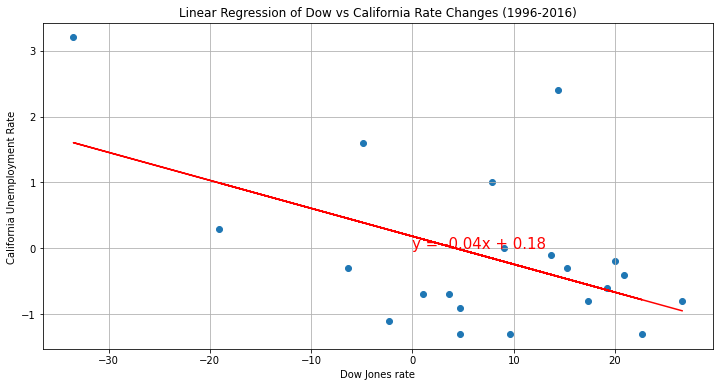

In [24]:
dow_df = pd.read_csv("outputs/clean_dow.csv")

dow_df = dow_df.loc[(dow_df['Year'] >= 1996)].reset_index(drop=True)
dow_df=dow_df.iloc[::-1].reset_index(drop=True)
dow_df

corr_dow_Cal = st.pearsonr(dow_df["Rate Change"],California_df['Rate Change'])
corr_dow_Cal = round(corr_dow_Cal[0],3)
print(f"The r-value is: {corr_dow_Cal}")

x_values = dow_df["Rate Change"]
y_values = California_df['Rate Change']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.rcParams["figure.figsize"] = (9, 6)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.ylabel('California Unemployment Rate ')
plt.xlabel('Dow Jones rate')
plt.title("Linear Regression of Dow vs California Rate Changes (1996-2016)")

plt.grid()